In [1]:
import numpy as np #导入NumPy数学工具箱
import pandas as pd #导入Pandas数据处理工具箱

In [2]:
df_bank = pd.read_csv('/content/drive/MyDrive/DL/data_test/handson_book/BankCustomer.csv')
df_bank.head() # 显示文件前5行

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          10000 non-null  object 
 1   Gender        10000 non-null  object 
 2   Age           10000 non-null  int64  
 3   City          10000 non-null  object 
 4   Tenure        10000 non-null  int64  
 5   ProductsNo    10000 non-null  int64  
 6   HasCard       10000 non-null  int64  
 7   ActiveMember  10000 non-null  int64  
 8   Credit        10000 non-null  int64  
 9   AccountBal    10000 non-null  float64
 10  Salary        10000 non-null  float64
 11  Exited        10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


<ipython-input-4-71095c4e960b>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


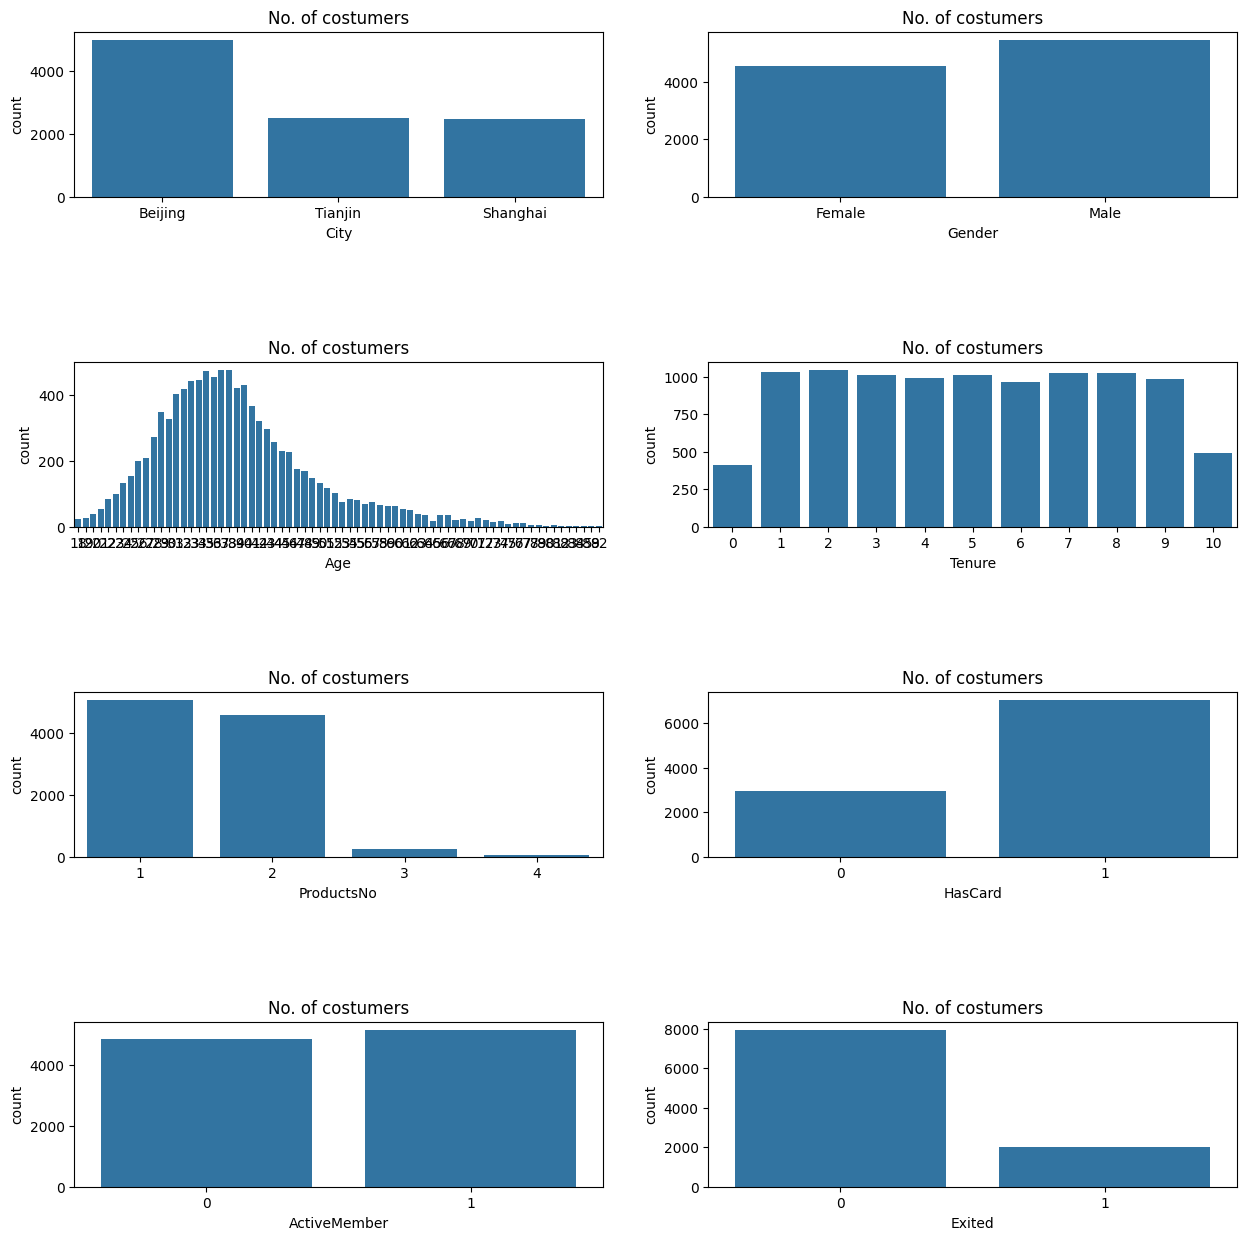

In [4]:
import matplotlib.pyplot as plt #导入matplotlib画图工具箱
import seaborn as sns #导入seaborn画图工具箱
# 显示不同特征的分布情况
features=[ 'City', 'Gender','Age','Tenure',
           'ProductsNo', 'HasCard', 'ActiveMember', 'Exited']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df_bank)
    plt.title("No. of costumers")

In [5]:
# 把二元类别文本数字化
df_bank['Gender'].replace("Female",0,inplace = True)
df_bank['Gender'].replace("Male",1,inplace=True)

In [6]:
# 显示数字类别
print("Gender unique values",df_bank['Gender'].unique())

Gender unique values [0 1]


In [7]:
# 把多元类别转换成多个二元哑变量，然后贴回原始数据集
d_city = pd.get_dummies(df_bank['City'], prefix = "City")
df_bank = [df_bank, d_city]
df_bank = pd.concat(df_bank, axis = 1)

In [8]:
y = df_bank ['Exited']
X = df_bank.drop(['Name', 'Exited','City'], axis=1)
X.head()

,Gender,Age,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,City_Beijing,City_Shanghai,City_Tianjin
0,0,40,9,2,0,1,516,6360.66,0.0000,1,0,0
1,1,69,6,2,0,1,682,28605.00,0.0000,1,0,0
2,0,32,9,1,1,1,803,10378.09,236311.0932,1,0,0
3,0,37,0,2,1,1,778,25564.01,129909.8079,0,0,1
4,1,55,4,3,1,0,547,3235.61,136976.1948,0,0,1


In [9]:
from sklearn.model_selection import train_test_split #拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler # 导入特征缩放器
sc = StandardScaler() # 特征缩放器
X_train = sc.fit_transform(X_train) # 拟合并应用于训练集
X_test = sc.transform (X_test) # 训练集结果应用于测试集

In [11]:
from sklearn.linear_model import LogisticRegression # 导入Sklearn模型
lr = LogisticRegression() # 逻辑回归模型
history = lr.fit(X_train,y_train) # 训练机器
print("逻辑回归测试集准确率 {:.2f}%".format(lr.score(X_test,y_test)*100))

逻辑回归测试集准确率 80.50%


In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=12, activation = 'relu'), #输入层
    tf.keras.layers.Dense(units=24, activation = 'relu'), #隐层
    tf.keras.layers.Dense(units=1, activation = 'sigmoid') #输出层，二分类
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
X_train.shape

(8000, 12)

In [16]:
history = model.fit(X_train, y_train, # 指定训练集
                  epochs=100,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_data=(X_test, y_test)) #指定验证集,这里为了简化模型，直接用测试集数据进行验证

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


125/125 [==============================] - 4s 12ms/step - loss: 0.5624 - accuracy: 0.7206 - val_loss: 0.4797 - val_accuracy: 0.7915
Epoch 2/100
125/125 [==============================] - 1s 7ms/step - loss: 0.4555 - accuracy: 0.7983 - val_loss: 0.4552 - val_accuracy: 0.7930
Epoch 3/100
125/125 [==============================] - 1s 11ms/step - loss: 0.4374 - accuracy: 0.8026 - val_loss: 0.4446 - val_accuracy: 0.7950
Epoch 4/100
125/125 [==============================] - 2s 13ms/step - loss: 0.4278 - accuracy: 0.8061 - val_loss: 0.4354 - val_accuracy: 0.7980
Epoch 5/100
125/125 [==============================] - 1s 8ms/step - loss: 0.4194 - accuracy: 0.8084 - val_loss: 0.4273 - val_accuracy: 0.8030
Epoch 6/100
125/125 [==============================] - 1s 10ms/step - loss: 0.4106 - accuracy: 0.8131 - val_loss: 0.4181 - val_accuracy: 0.8060
Epoch 7/100
125/125 [==============================] - 1s 5ms/step - loss: 0.4010 - accuracy: 0.8190 - val_loss: 0.4087 - val_accuracy: 0.8210
Epoch 8

In [ ]:
history.history

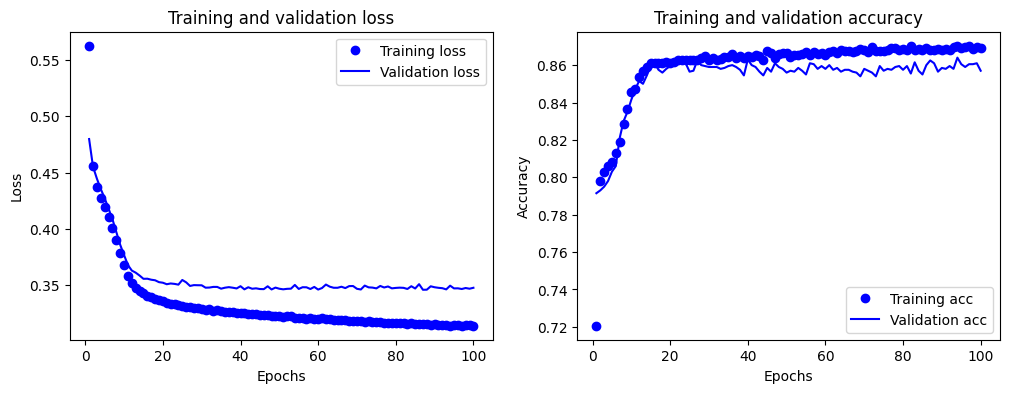

In [18]:
# 这段代码参考《Python深度学习》一书中的学习曲线的实现
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
show_history(history) # 调用这个函数，并将神经网络训练历史数据作为参数输入

In [19]:
y_pred = model.predict(X_test,batch_size=10) # 预测测试集的标签

200/200 [==============================] - 0s 2ms/step


In [20]:
y_pred = np.round(y_pred) # 四舍五入，将分类概率值转换成0/1整数值

In [21]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [22]:
from sklearn.metrics import classification_report # 导入分类报告
def show_report(X_test, y_test, y_pred): # 定义一个函数显示分类报告
    if y_test.shape != (2000,1):
        y_test = y_test.values # 把Panda series转换成Numpy array
        y_test = y_test.reshape((len(y_test),1)) # 转换成与y_pred相同的形状
    print(classification_report(y_test,y_pred,labels=[0, 1])) #调用分类报告

In [23]:
show_report(X_test, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1583
           1       0.74      0.48      0.59       417

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

